# Analysis of Global Nucleosome Positioning in *Arabidopsis thaliana*
**Author**: Emma Tung Corcoran </br>
**Date Last Modified**: November 14, 2021 </br>

In [1]:
#Load required dependencies
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import pandas as pd
import os
import seaborn as sns
from scipy.stats import ttest_ind, ttest_rel
import statistics

In [2]:
#Set path to save plot
save_path = "/Users/emmacorcoran/Documents/Jupyter Code/ISWI_MNase_11_11/arid5-2 for paper"

## Load and Clean Data
First, I load the data generated using deeptools and clean by removing empty columns, adding columns corresponding to gene names, and subsectioning data by sample. I also take a look at the metaprofiles by plotting the sum over all genes.

In [3]:
#Set font 
plt.rcParams.update({'font.sans-serif':'Arial'})
plt.rcParams.update({'font.size': 20})
plt.rcParams['lines.linewidth'] = 2.5

In [4]:
#Load data matrices
#Profile values at each gene
base_path = "/Users/emmacorcoran/Documents/NGS Data/ISWI_MNase_11_11/all_arid5-2/deeptools"
filename = "mnase-merged-proteincoding.tab"
path_to_file = os.path.join(base_path, filename)
data_matrix = pd.read_csv(path_to_file, skiprows=2, sep='\t')

In [5]:
data_matrix.head()

,Col-1,Col-1.1,Col-1.2,Col-1.3,Col-1.4,Col-1.5,Col-1.6,Col-1.7,Col-1.8,Col-1.9,...,rlt12-2.240,rlt12-2.241,rlt12-2.242,rlt12-2.243,rlt12-2.244,rlt12-2.245,rlt12-2.246,rlt12-2.247,rlt12-2.248,rlt12-2.249
0,0.028910,0.05294,0.05050,0.067770,0.070590,0.075280,0.10550,0.08035,0.08110,0.05932,...,0.06388,0.06270,0.06505,0.06642,0.04977,0.03233,0.02234,0.02371,0.02293,0.03272
1,0.004881,0.00000,0.00000,0.000000,0.000000,0.000000,0.00000,0.00000,0.00000,0.00000,...,0.04624,0.04174,0.05447,0.05192,0.04977,0.05878,0.04134,0.03586,0.04801,0.04330
2,0.029100,0.02497,0.01990,0.008448,0.007697,0.008072,0.02328,0.04918,0.05913,0.05970,...,0.03292,0.06035,0.06701,0.05917,0.05349,0.02195,0.01176,0.02724,0.03547,0.04311
3,0.030040,0.03642,0.06477,0.066460,0.059890,0.054820,0.03229,0.02628,0.02027,0.02553,...,0.02724,0.03017,0.02606,0.02665,0.02175,0.01959,0.02038,0.03155,0.05153,0.05682
4,0.056690,0.04337,0.02722,0.044300,0.054250,0.064200,0.06908,0.06195,0.05444,0.04017,...,0.07269,0.08778,0.07779,0.06936,0.06250,0.04350,0.04428,0.04605,0.04076,0.04076


In [6]:
#Matrix containing gene names corresponding to each row of data_matrix
filename = "mnase-merged-proteincoding.bed"
path_to_file = os.path.join(base_path, filename)
sorted_genes = pd.read_csv(path_to_file, sep='\t')
#Make dataframe containing gene names and relabel gene naming convention to correspond with RNA-seq data
gene_names = sorted_genes['name'].copy()
gene_num = len(gene_names)
for i in range(gene_num):
    newname = gene_names[i]
    if newname[0:2] == 'AT':
        gene_names[i] = newname[0:-2]

In [7]:
#Make metadata matrix (has profile values and gene names)
metadata = data_matrix.copy()
metadata['gene name'] = gene_names

In [8]:
metadata.head()

,Col-1,Col-1.1,Col-1.2,Col-1.3,Col-1.4,Col-1.5,Col-1.6,Col-1.7,Col-1.8,Col-1.9,...,rlt12-2.241,rlt12-2.242,rlt12-2.243,rlt12-2.244,rlt12-2.245,rlt12-2.246,rlt12-2.247,rlt12-2.248,rlt12-2.249,gene name
0,0.028910,0.05294,0.05050,0.067770,0.070590,0.075280,0.10550,0.08035,0.08110,0.05932,...,0.06270,0.06505,0.06642,0.04977,0.03233,0.02234,0.02371,0.02293,0.03272,AT1G01010
1,0.004881,0.00000,0.00000,0.000000,0.000000,0.000000,0.00000,0.00000,0.00000,0.00000,...,0.04174,0.05447,0.05192,0.04977,0.05878,0.04134,0.03586,0.04801,0.04330,AT1G01020
2,0.029100,0.02497,0.01990,0.008448,0.007697,0.008072,0.02328,0.04918,0.05913,0.05970,...,0.06035,0.06701,0.05917,0.05349,0.02195,0.01176,0.02724,0.03547,0.04311,AT1G01030
3,0.030040,0.03642,0.06477,0.066460,0.059890,0.054820,0.03229,0.02628,0.02027,0.02553,...,0.03017,0.02606,0.02665,0.02175,0.01959,0.02038,0.03155,0.05153,0.05682,AT1G01040
4,0.056690,0.04337,0.02722,0.044300,0.054250,0.064200,0.06908,0.06195,0.05444,0.04017,...,0.08778,0.07779,0.06936,0.06250,0.04350,0.04428,0.04605,0.04076,0.04076,AT1G01050


## Plot Sum of All Genes

In [9]:
#Add cumulative sum of nucleosome occupancy over all genes and plot profile

#sum all rows
rowsum = data_matrix.sum(axis=0)/27443

#Split data by sample
Col_data = rowsum[0:250].tolist()
rH4_data = rowsum[250:500].tolist()
R17A_data = rowsum[500:750].tolist()
arid5_1_data = rowsum[750:1000].tolist()
rlt12_data = rowsum[1000:1250].tolist()

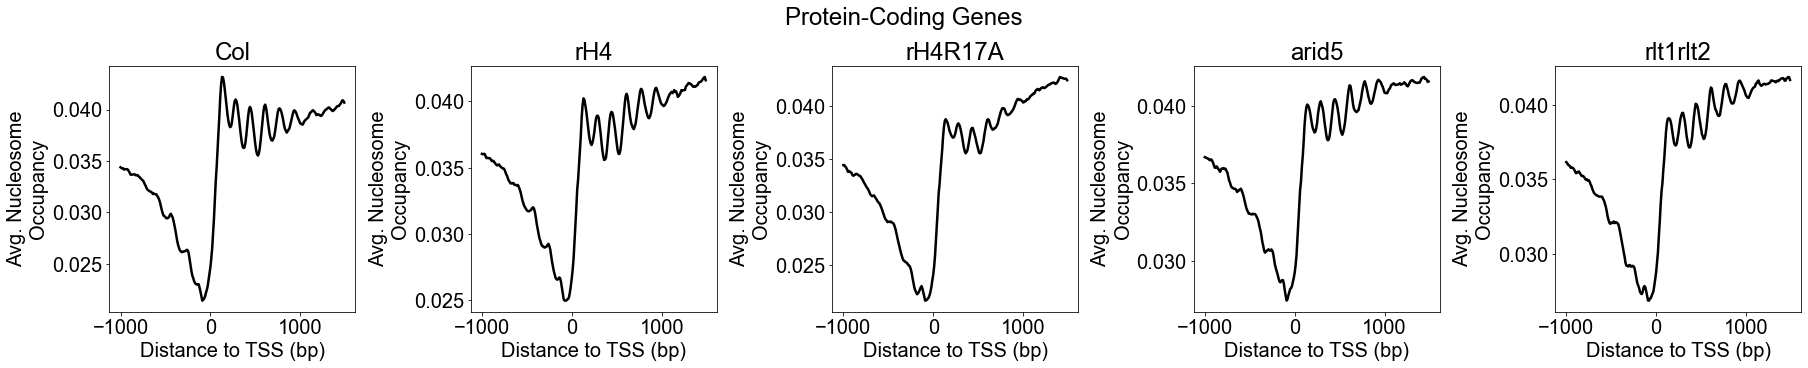

In [10]:
#Plot data
x_vals = np.arange(-1000,1500,10)
fig, axs = plt.subplots(1, 5, constrained_layout=True)
fig.set_size_inches(25, 5)
for ax in axs.flat:
    ax.set(xlabel='Distance to TSS (bp)', ylabel="Avg. Nucleosome" "\n" "Occupancy")
axs[0].plot(x_vals, Col_data, color="black")
axs[0].set_title('Col')

axs[1].plot(x_vals, rH4_data, color="black")
axs[1].set_title('rH4')

axs[2].plot(x_vals, R17A_data, color="black")
axs[2].set_title('rH4R17A')

axs[3].plot(x_vals, arid5_1_data, color="black")
axs[3].set_title('arid5')

axs[4].plot(x_vals, rlt12_data, color="black")
axs[4].set_title('rlt1rlt2')

fig.suptitle('Protein-Coding Genes')
filename = "protein-coding_profiles/merged_reps_1500down"
path_to_file = os.path.join(save_path, filename)
plt.savefig(path_to_file)

In [11]:
# Obtain minimum and maximum from each +1 through +6 nucleosomes and the minimum for 5' NFR

#Function to calculate maximum or minimum for range
def get_max(data, tss_start, start, end, maxmin=True):
    if maxmin==True:
        return max(data[tss_start+start:tss_start+end])
    else:
        return min(data[tss_start+start:tss_start+end])

In [12]:
# Function to obtain minima and maxima from +1 through +6 nucleosomes and calculate peak height
## Manually put in range around minimum and maximum for each peak - should double check for additional profiles that 
# these values are in the correct regions (can use argmax and argmin to print values for Col)
def calc_peaks(nuc_data, firstnuc=3, norm=False):
    # 3 options for first nuc: (1) take average of 5' and 3' minima, (2) use only 3' minimum, (3) ignore
    
    # Nucleosome maxima and minima are spaced approximately 150 bp apart
    # Each coordinate is 10 bp bin
    #+1 nucleosome max: 120 to 140
    #+1 nucleosome min: 210 to 230
    #+2 nucleosome max: 270 to 290
    #+2 nucleosome min: 360 to 380
    #+3 nucleosome max: 430 to 450
    #+3 nucleosome min: 520 to 540
    #+4 nucleosome max: 600 to 620
    #+4 nucleosome min: 680 to 700
    #+5 nucleosome max: 760 to 780
    #+5 nucleosome min: 840 to 860
    #+6 nucleosome max: 930 to 950
    #+6 nucleosome min: 1010 to 1030

    # Set TSS start coordinate to 100
    tss_start = 100
    
    # Get minimum of 5' NFR
    nfr_min = min(nuc_data)
    
    # Get maximum nucleosome occupancy score
    total_max = max(nuc_data[tss_start:tss_start+108])
    
    # Set normalization factor
    if norm==True:
        norm_factor=total_max-nfr_min
    else:
        norm_factor=1
    
    # Calculate all maxima and minima
    nuc1_max = get_max(nuc_data, tss_start, 12, 14, True)
    nuc1_min = get_max(nuc_data, tss_start, 21, 23, False)
    nuc2_max = get_max(nuc_data, tss_start, 27, 29, True)
    nuc2_min = get_max(nuc_data, tss_start, 36, 38, False)
    nuc3_max = get_max(nuc_data, tss_start, 43, 45, True)
    nuc3_min = get_max(nuc_data, tss_start, 52, 54, False)
    nuc4_max = get_max(nuc_data, tss_start, 60, 62, True)
    nuc4_min = get_max(nuc_data, tss_start, 68, 70, False)
    nuc5_max = get_max(nuc_data, tss_start, 76, 78, True)
    nuc5_min = get_max(nuc_data, tss_start, 84, 86, False)
    nuc6_max = get_max(nuc_data, tss_start, 93, 95, True)
    nuc6_min = get_max(nuc_data, tss_start, 101, 103, False)
    
    # Calculate peak heights
    peak2_height = (nuc2_max-statistics.mean([nuc1_min,nuc2_min]))/norm_factor
    peak3_height = (nuc3_max-statistics.mean([nuc2_min,nuc3_min]))/norm_factor
    peak4_height = (nuc4_max-statistics.mean([nuc3_min,nuc4_min]))/norm_factor
    peak5_height = (nuc5_max-statistics.mean([nuc4_min,nuc5_min]))/norm_factor
    peak6_height = (nuc6_max-statistics.mean([nuc5_min,nuc6_min]))/norm_factor
    if firstnuc==1:
        peak1_height = (nuc1_max-statistics.mean([nfr_min,nuc1_min]))/norm_factor
    elif firstnuc==2:
        peak1_height = (nuc1_max-statistics.mean([nuc1_min,nuc1_min]))/norm_factor
    else:
        return [peak2_height, peak3_height, peak4_height, peak5_height, peak6_height]
    
    # Return peak heights
    return [peak1_height, peak2_height, peak3_height, peak4_height, peak5_height, peak6_height]

In [13]:
peak_data = []

# Calculate peak data for each sample and append to list
peak_data.append(calc_peaks(Col_data))
peak_data.append(calc_peaks(rH4_data))
peak_data.append(calc_peaks(R17A_data))
peak_data.append(calc_peaks(arid5_1_data))
peak_data.append(calc_peaks(rlt12_data))

# Initialize peak data frame
colnames_merge = ['Col', 'rH4', 'rH4R17A', 'arid5', 'rlt1rlt2']
peak_df = pd.DataFrame(np.array(peak_data).T.tolist(), columns=colnames_merge)
peak_df.head()

,Col,rH4,rH4R17A,arid5,rlt1rlt2
0,0.003708,0.002760,0.002086,0.002143,0.002082
1,0.004372,0.003390,0.002385,0.002448,0.002646
2,0.004236,0.003598,0.002027,0.002458,0.002666
3,0.002758,0.002604,0.001241,0.001602,0.001709
4,0.001763,0.001813,0.000886,0.001211,0.001340


In [14]:
# Calculate statistics and add to dataframe
# Normalize data to Col
Col_avg = peak_df['Col'].mean()
stats_df = peak_df.copy()/Col_avg
stats_df.insert(0, 'label', ["Nuc2","Nuc3","Nuc4","Nuc5","Nuc6"])
stats_df = stats_df.to_numpy()
Col_pvals = []
rH4_pvals = []
for sample in list(peak_df.columns):
    if (sample=="Col"):
        pval_vCol = 1
    else:
        pval_vCol = ttest_rel(peak_df['Col'], peak_df[sample])[1]
    Col_pvals.append(pval_vCol)
    if (sample=="rH4"):
        pval_vrH4 = 1
    else:
        pval_vrH4 = ttest_rel(peak_df['rH4'], peak_df[sample])[1]
    rH4_pvals.append(pval_vrH4)
Col_pvals.insert(0,"ttest_vs_Col")
rH4_pvals.insert(0,"ttest_vs_rH4")
stats_df=np.vstack([stats_df,Col_pvals])
stats_df=np.vstack([stats_df,rH4_pvals])

In [15]:
test_names = ['name']+colnames_merge
tosave = pd.DataFrame(stats_df,columns = test_names)

In [16]:
tosave.head()

,name,Col,rH4,rH4R17A,arid5,rlt1rlt2
0,Nuc2,1.101103,0.819696,0.619363,0.636515,0.618364
1,Nuc3,1.298474,1.00681,0.708437,0.726977,0.785787
2,Nuc4,1.257937,1.068568,0.601951,0.730027,0.79187
3,Nuc5,0.818942,0.773379,0.368407,0.475903,0.507534
4,Nuc6,0.523544,0.538279,0.26324,0.359672,0.397889


In [17]:
# Save data frame with nucleosome peak information
tosave.to_csv(save_path+"/peak_height/csv_files/merged_heights.csv",index=True)

## Combine nucleosome positioning data with expression data from RNA-seq

In [18]:
# Subset data to only include protein coding genes (Chr1-5)
# Load protein coding gene annotation file
base_path = "/Users/emmacorcoran/Desktop/annotations"
filename = "proteincoding_1to5.txt"
path_to_file = os.path.join(base_path, filename)
proteincoding_list = pd.read_csv(path_to_file, sep='\t', header=None)
proteincoding_list.columns = ['gene name','classification']

In [19]:
# Merge metadata with protein coding list
metadata = pd.merge(metadata, proteincoding_list, on="gene name")
metadata.head()

,Col-1,Col-1.1,Col-1.2,Col-1.3,Col-1.4,Col-1.5,Col-1.6,Col-1.7,Col-1.8,Col-1.9,...,rlt12-2.242,rlt12-2.243,rlt12-2.244,rlt12-2.245,rlt12-2.246,rlt12-2.247,rlt12-2.248,rlt12-2.249,gene name,classification
0,0.028910,0.05294,0.05050,0.067770,0.070590,0.075280,0.10550,0.08035,0.08110,0.05932,...,0.06505,0.06642,0.04977,0.03233,0.02234,0.02371,0.02293,0.03272,AT1G01010,protein_coding
1,0.004881,0.00000,0.00000,0.000000,0.000000,0.000000,0.00000,0.00000,0.00000,0.00000,...,0.05447,0.05192,0.04977,0.05878,0.04134,0.03586,0.04801,0.04330,AT1G01020,protein_coding
2,0.029100,0.02497,0.01990,0.008448,0.007697,0.008072,0.02328,0.04918,0.05913,0.05970,...,0.06701,0.05917,0.05349,0.02195,0.01176,0.02724,0.03547,0.04311,AT1G01030,protein_coding
3,0.030040,0.03642,0.06477,0.066460,0.059890,0.054820,0.03229,0.02628,0.02027,0.02553,...,0.02606,0.02665,0.02175,0.01959,0.02038,0.03155,0.05153,0.05682,AT1G01040,protein_coding
4,0.056690,0.04337,0.02722,0.044300,0.054250,0.064200,0.06908,0.06195,0.05444,0.04017,...,0.07779,0.06936,0.06250,0.04350,0.04428,0.04605,0.04076,0.04076,AT1G01050,protein_coding


In [20]:
#Load RNA-seq tpm expression data
def rnaseq_load(path):
    tpm_file = pd.read_csv(path, sep='\t', header=0)
    tpm_file.columns = ['gene name','rep1','rep2']
    tpm_file['avg'] = tpm_file[['rep1', 'rep2']].mean(axis=1)
    tpm_file = tpm_file.sort_values(by=['gene name'])
    return tpm_file

In [21]:
base_path_1 = "/Users/emmacorcoran/Documents/R Scripts/RNA-seq/2020_10_02 RNA-seq/tpm/ordered_tpm_avg/"
base_path_2 = "/Users/emmacorcoran/Documents/R Scripts/RNA-seq/2021_05_21 RNA-seq/tpm/ordered_tpm_avg/"
base_path_3 = "/Users/emmacorcoran/Documents/R Scripts/RNA-seq/2021_07_08 RNA-seq/tpm/ordered_tpm_avg/"
base_path_4 = "/Users/emmacorcoran/Documents/R Scripts/RNA-seq/2021_09_16 RNA-seq/tpm/ordered_tpm_avg/"

#Load Col expression data
filename = "Col_ordered_tpm.txt"
path_to_file = os.path.join(base_path_1, filename)
Col_tpm = rnaseq_load(path_to_file)

#Load rH4-1 (68-21C) expression data
filename = "68-21C_ordered_tpm.txt"
path_to_file = os.path.join(base_path_1, filename)
x68_21C_tpm = rnaseq_load(path_to_file)

#Load rH4-2 (68-18D) expression data
filename = "x68_18D_ordered_tpm.txt"
path_to_file = os.path.join(base_path_4, filename)
x68_18D_tpm = rnaseq_load(path_to_file)

#Load H4R17A-1 (13-6) expression data
filename = "13-6_ordered_tpm.txt"
path_to_file = os.path.join(base_path_2, filename)
x13_6_tpm = rnaseq_load(path_to_file)

#Load H4R17A-2 (13-9) expression data
filename = "13-9_ordered_tpm.txt"
path_to_file = os.path.join(base_path_1, filename)
x13_9_tpm = rnaseq_load(path_to_file)

#Load arid5 expression data
filename = "arid5_ordered_tpm.txt"
path_to_file = os.path.join(base_path_2, filename)
arid5_tpm = rnaseq_load(path_to_file)

#Load rlt1/2 expression data
filename = "rlt12_ordered_tpm.txt"
path_to_file = os.path.join(base_path_3, filename)
rlt12_tpm = rnaseq_load(path_to_file)

In [22]:
#Merge metadata with tpm expression data and subset for one sample, plot expression groups
def rowsum_tpm(all_data, tpm_label):
    tpm_data = all_data.loc[all_data['expression category'] == tpm_label]
    tpm_data = tpm_data.iloc[:,0:250]
    nrow = tpm_data.shape[0]
    tpm_rowsum = np.array(tpm_data.sum(axis=0))/nrow
    return tpm_rowsum

In [23]:
def tpm_expression_4groups(metadata_df, tpm_data, sample_colstart, sample_colend):
    #Merge metadata with tpm expression data and subset for one sample
    all_data = pd.merge(metadata_df, tpm_data, on="gene name")
    subset_data = all_data.iloc[:,sample_colstart:sample_colend]
    subset_data['gene name'] = all_data['gene name']
    subset_data['expression'] = all_data['avg']

    ### Add column to metadata with gene groups
    # Make gene groups and count number of genes in each group
    high_tpm = (subset_data['expression']>=2.5)
    medhigh_tpm = ((subset_data['expression']>=0.5) & (subset_data['expression']<2.5))
    medlow_tpm = ((subset_data['expression']>0) & (subset_data['expression']<0.5))
    low_tpm = (subset_data['expression']==0)

    # Add expression category column to metadata and fill in with values
    n = len(subset_data['expression'])
    subset_data['expression category'] = ["NA"] * n
    subset_data.loc[high_tpm==True, ['expression category']] = "very high"
    subset_data.loc[medhigh_tpm==True, ['expression category']] = "high"
    subset_data.loc[medlow_tpm==True, ['expression category']] = "low"
    subset_data.loc[low_tpm==True, ['expression category']] = "very low"
    
    #Sum rows of different tpm groups
    high_rowsum = rowsum_tpm(subset_data, "very high")
    medhigh_rowsum = rowsum_tpm(subset_data, "high")
    medlow_rowsum = rowsum_tpm(subset_data, "low")
    low_rowsum = rowsum_tpm(subset_data, "very low")
    
    return [high_rowsum, medhigh_rowsum, medlow_rowsum, low_rowsum]

In [24]:
def tpm_expression_2groups(metadata_df, tpm_data, sample_colstart, sample_colend):
    #Merge metadata with tpm expression data and subset for one sample
    all_data = pd.merge(metadata_df, tpm_data, on="gene name")
    subset_data = all_data.iloc[:,sample_colstart:sample_colend]
    subset_data['gene name'] = all_data['gene name']
    subset_data['expression'] = all_data['avg']

    ### Add column to metadata with gene groups
    # Make gene groups and count number of genes in each group
    high_tpm = (subset_data['expression']>=0.5)
    low_tpm = subset_data['expression']<0.5

    # Add expression category column to metadata and fill in with values
    n = len(subset_data['expression'])
    subset_data['expression category'] = ["NA"] * n
    subset_data.loc[high_tpm==True, ['expression category']] = "high"
    subset_data.loc[low_tpm==True, ['expression category']] = "low"
    
    #Sum rows of different tpm groups
    high_rowsum = rowsum_tpm(subset_data, "high")
    low_rowsum = rowsum_tpm(subset_data, "low")
    
    return [high_rowsum, low_rowsum]

## Plots separated by expression level

In [25]:
Col_4subset = tpm_expression_4groups(metadata, Col_tpm, 0, 250)
rH4_4subset = tpm_expression_4groups(metadata, x68_21C_tpm, 250, 500)
R17A_4subset = tpm_expression_4groups(metadata, x13_6_tpm, 500, 750)
arid5_1_4subset = tpm_expression_4groups(metadata, arid5_tpm, 750, 1000)
rlt12_4subset = tpm_expression_4groups(metadata, rlt12_tpm, 1000, 1250)

In [26]:
Col_2subset = tpm_expression_2groups(metadata, Col_tpm, 0, 250)
rH4_2subset = tpm_expression_2groups(metadata, x68_21C_tpm, 250, 500)
R17A_2subset = tpm_expression_2groups(metadata, x13_6_tpm, 500, 750)
arid5_1_2subset = tpm_expression_2groups(metadata, arid5_tpm, 750, 1000)
rlt12_2subset = tpm_expression_2groups(metadata, rlt12_tpm, 1000, 1250)

In [27]:
# Function to plot peak data
def make_peak_plots(peak_df, name):
    
    # Plot boxplot
    ax = sns.boxplot(x="variable", y="value", data=pd.melt(peak_df), showfliers = False)
    plt.ylabel("$\Delta$ Nucleosome" "\n" "Occupancy")
    plt.xlabel("")
    plt.xticks(rotation = 45)
    filename = "peak_height/"+str(name)+"_boxplot"
    path_to_file = os.path.join(save_path, filename)
    plt.gcf().set_size_inches(10, 6)
    plt.savefig(path_to_file,bbox_inches='tight',dpi=500)
    plt.clf()
    plt.close()
    
    # Plot bar plot with means and CI
    ax = sns.barplot(x="variable", y="value", data=pd.melt(peak_df), errwidth=2, capsize=.2, edgecolor=".2")
    plt.ylabel("$\Delta$ Nucleosome" "\n" "Occupancy")
    plt.xlabel("")
    plt.xticks(rotation = 45)
    filename = "peak_height/"+str(name)+"_barplot"
    path_to_file = os.path.join(save_path, filename)
    plt.gcf().set_size_inches(10, 6)
    plt.savefig(path_to_file,bbox_inches='tight',dpi=500)
    plt.clf()
    plt.close()
    
    
    # Calculate statistics and add to dataframe
    Col_avg = peak_df['Col'].mean()
    stats_df = peak_df.copy()/Col_avg
    stats_df.insert(0, 'label', ["Nuc2","Nuc3","Nuc4","Nuc5","Nuc6"])
    stats_df = stats_df.to_numpy()
    Col_pvals = []
    rH4_pvals = []
    for sample in list(peak_df.columns):
        if (sample=="Col"):
            pval_vCol = 1
        else:
            pval_vCol = ttest_rel(peak_df['Col'], peak_df[sample])[1]
        Col_pvals.append(pval_vCol)
        if (sample=="rH4"):
            pval_vrH4 = 1
        else:
            pval_vrH4 = ttest_rel(peak_df['rH4'], peak_df[sample])[1]
        rH4_pvals.append(pval_vrH4)
    Col_pvals.insert(0,"ttest_vs_Col")
    rH4_pvals.insert(0,"ttest_vs_rH4")
    stats_df=np.vstack([stats_df,Col_pvals])
    stats_df=np.vstack([stats_df,rH4_pvals])
    
    test_names = ['name']+list(peak_df.columns)
    tosave = pd.DataFrame(stats_df,columns = test_names)
    
    # Save data frame with nucleosome peak information
    tosave.to_csv(save_path+"/peak_height/csv_files/"+str(name)+".csv",index=True)

In [28]:
for i in range(4):
    peak_data = []

    # Calculate peak data for each sample and append to list
    peak_data.append(calc_peaks(Col_4subset[i]))
    peak_data.append(calc_peaks(rH4_4subset[i]))
    peak_data.append(calc_peaks(R17A_4subset[i]))
    peak_data.append(calc_peaks(arid5_1_4subset[i]))
    peak_data.append(calc_peaks(rlt12_4subset[i]))

    # Initialize peak data frame
    peak_df = pd.DataFrame(np.array(peak_data).T.tolist(), columns=colnames_merge)
    
    # Make plots and save data
    if i==0:
        make_peak_plots(peak_df, "very_high_exp")
    elif i==1:
        make_peak_plots(peak_df, "high_exp")
    elif i==2:
        make_peak_plots(peak_df, "low_exp")
    else:
        make_peak_plots(peak_df, "very_low_exp")

In [29]:
for i in range(2):
    peak_data = []

    # Calculate peak data for each sample and append to list
    peak_data.append(calc_peaks(Col_2subset[i]))
    peak_data.append(calc_peaks(rH4_2subset[i]))
    peak_data.append(calc_peaks(R17A_2subset[i]))
    peak_data.append(calc_peaks(arid5_1_2subset[i]))
    peak_data.append(calc_peaks(rlt12_2subset[i]))

    # Initialize peak data frame
    peak_df = pd.DataFrame(np.array(peak_data).T.tolist(), columns=colnames_merge)
    
    # Make plots and save data
    if i==0:
        make_peak_plots(peak_df, "2groups_high_exp")
    elif i==1:
        make_peak_plots(peak_df, "2groups_low_exp")

## DEG Plots

In [30]:
# Load DEG data
def deg_load(path, name):
    deg_file = pd.read_csv(path_to_file, sep='\t', header=None)
    deg_file.columns = [name]
    return deg_file

base_path = "/Users/emmacorcoran/Documents/R Scripts/RNA-seq/2021_09_16 RNA-seq/Up_and_Down"

#chr11/17 down-regulated genes
filename = "chr11chr17_downreg.txt"
path_to_file = os.path.join(base_path, filename)
chr_downreg = deg_load(path_to_file, "gene name")
#chr11/17 up-regulated genes
filename = "chr11chr17_upreg.txt"
path_to_file = os.path.join(base_path, filename)
chr_upreg = deg_load(path_to_file, "gene name")

#R17A-2 down-regulated genes
filename = "13.9_downreg.txt"
path_to_file = os.path.join(base_path, filename)
x13_9_downreg = deg_load(path_to_file, "gene name")
#R17A-2 up-regulated genes
filename = "13.9_upreg.txt"
path_to_file = os.path.join(base_path, filename)
x13_9_upreg = deg_load(path_to_file, "gene name")

#R17A-1 down-regulated genes
filename = "13.6_downreg.txt"
path_to_file = os.path.join(base_path, filename)
x13_6_downreg = deg_load(path_to_file, "gene name")
#R17A-1 up-regulated genes
filename = "13.6_upreg.txt"
path_to_file = os.path.join(base_path, filename)
x13_6_upreg = deg_load(path_to_file, "gene name")

#arid5 down-regulated genes
filename = "arid5_downreg.txt"
path_to_file = os.path.join(base_path, filename)
arid5_downreg = deg_load(path_to_file, "gene name")
#arid5 up-regulated genes
filename = "arid5_upreg.txt"
path_to_file = os.path.join(base_path, filename)
arid5_upreg = deg_load(path_to_file, "gene name")

#rlt1/2 down-regulated genes
filename = "rlt12_downreg.txt"
path_to_file = os.path.join(base_path, filename)
rlt12_downreg = deg_load(path_to_file, "gene name")
#rlt1/2 up-regulated genes
filename = "rlt12_upreg.txt"
path_to_file = os.path.join(base_path, filename)
rlt12_upreg = deg_load(path_to_file, "gene name")

In [31]:
def merge_upanddown(metadata, downreg, upreg):
    downreg_subset = pd.merge(metadata, downreg, on="gene name")
    upreg_subset = pd.merge(metadata, upreg, on="gene name")
    upreg_subset['DEG'] = "up"
    downreg_subset['DEG'] = "down"
    deg_subset = downreg_subset.append(upreg_subset)
    return(deg_subset)

In [32]:
#Merge metadata with DEG data
chr_deg_subset = merge_upanddown(metadata, chr_downreg, chr_upreg)
arid5_deg_subset = merge_upanddown(metadata, arid5_downreg, arid5_upreg)
rlt12_deg_subset = merge_upanddown(metadata, rlt12_downreg, rlt12_upreg)
x13_6_deg_subset = merge_upanddown(metadata, x13_6_downreg, x13_6_upreg)
x13_9_deg_subset = merge_upanddown(metadata, x13_9_downreg, x13_9_upreg)

In [33]:
def merge_all(metadata, deg_1, deg_2, deg_3=None, deg_4=None, deg_5=None):
    all_deg = pd.merge(deg_1, deg_2, on="gene name", how="outer")
    if deg_3 is not None:
        all_deg = pd.merge(all_deg, deg_3, on="gene name", how="outer")
    if deg_4 is not None:
        all_deg = pd.merge(all_deg, deg_4, on="gene name", how="outer")
    if deg_5 is not None:
        all_deg = pd.merge(all_deg, deg_5, on="gene name", how="outer")
    deg_subset = pd.merge(metadata, all_deg, on="gene name")
    return(deg_subset)

In [34]:
chr_deg = pd.merge(chr_downreg, chr_upreg, how="outer")
arid5_deg = pd.merge(arid5_downreg, arid5_upreg, how="outer")
rlt12_deg = pd.merge(rlt12_downreg, rlt12_upreg, how="outer")
x13_6_deg = pd.merge(x13_6_downreg, x13_6_upreg, how="outer")
x13_9_deg = pd.merge(x13_9_downreg, x13_9_upreg, how="outer")
x13_deg = pd.merge(x13_6_deg, x13_9_deg, how="outer")

iswi_deg_subset = merge_all(metadata, chr_deg, arid5_deg, rlt12_deg)
all_deg_subset = merge_all(metadata, chr_deg, arid5_deg, rlt12_deg, x13_deg)
x13_deg_subset = merge_all(metadata, x13_6_deg, x13_9_deg)

In [35]:
#Unaffected genes
# Load DEG data
def deg_load(path, name):
    deg_file = pd.read_csv(path_to_file, sep='\t', header=None)
    deg_file.columns = [name]
    return deg_file

base_path = "/Users/emmacorcoran/Documents/R Scripts/RNA-seq/2021_09_16 RNA-seq/Unaffected"

#chr11/17 Unaffected genes
filename = "chrvsCol.txt"
path_to_file = os.path.join(base_path, filename)
chr_unaffected = deg_load(path_to_file, "gene name")

#arid5 Unaffected genes
filename = "arid5vsCol.txt"
path_to_file = os.path.join(base_path, filename)
arid5_unaffected = deg_load(path_to_file, "gene name")

#rlt1/2 Unaffected genes
filename = "rlt12vsCol.txt"
path_to_file = os.path.join(base_path, filename)
rlt12_unaffected = deg_load(path_to_file, "gene name")

#13.6 Unaffected genes
filename = "13.6vsCol.txt"
path_to_file = os.path.join(base_path, filename)
s13_6_unaffected = deg_load(path_to_file, "gene name")

#13.9 Unaffected genes
filename = "13.9vsCol.txt"
path_to_file = os.path.join(base_path, filename)
s13_9_unaffected = deg_load(path_to_file, "gene name")

In [36]:
def merge_unaffected(metadata, deg_1, deg_2, deg_3=None, deg_4=None, deg_5=None):
    all_deg = pd.merge(deg_1, deg_2, on="gene name", how="outer")
    if deg_3 is not None:
        all_deg = pd.merge(all_deg, deg_3, on="gene name", how="outer")
    if deg_4 is not None:
        all_deg = pd.merge(all_deg, deg_4, on="gene name", how="outer")
    if deg_5 is not None:
        all_deg = pd.merge(all_deg, deg_5, on="gene name", how="outer")
    deg_subset = pd.merge(metadata, all_deg, on="gene name")
    return(deg_subset)

In [37]:
chr_unaffected_subset = pd.merge(metadata, chr_unaffected, on="gene name")
rlt12_unaffected_subset = pd.merge(metadata, rlt12_unaffected, on="gene name")
arid5_unaffected_subset = pd.merge(metadata, arid5_unaffected, on="gene name")
s13_6_unaffected_subset = pd.merge(metadata, s13_6_unaffected, on="gene name")
s13_9_unaffected_subset = pd.merge(metadata, s13_9_unaffected, on="gene name")

x13_unaffected = pd.merge(s13_6_unaffected, s13_9_unaffected, how="outer")

iswi_unaffected_subset = merge_unaffected(metadata, chr_unaffected, arid5_unaffected, rlt12_unaffected)
all_unaffected_subset = merge_unaffected(metadata, chr_unaffected, arid5_unaffected, rlt12_unaffected, x13_unaffected)
x13_unaffected_subset = merge_unaffected(metadata, s13_6_unaffected, s13_9_unaffected)

In [38]:
#Merge metadata with DEG data (separate up and down)
chr_down_subset = pd.merge(metadata, chr_downreg, on="gene name")
chr_up_subset = pd.merge(metadata, chr_upreg, on="gene name")
arid5_down_subset = pd.merge(metadata, arid5_downreg, on="gene name")
arid5_up_subset = pd.merge(metadata, arid5_upreg, on="gene name")
rlt12_down_subset = pd.merge(metadata, rlt12_downreg, on="gene name")
rlt12_up_subset = pd.merge(metadata, rlt12_upreg, on="gene name")

In [39]:
# Make up- and down-regulated gene lists
iswi_downreg_subset = merge_all(metadata, chr_downreg, arid5_downreg, rlt12_downreg)
iswi_upreg_subset = merge_all(metadata, chr_upreg, arid5_upreg, rlt12_upreg)
x13_downreg_subset = merge_all(metadata, x13_6_downreg, x13_9_downreg)
x13_upreg_subset = merge_all(metadata, x13_6_upreg, x13_9_upreg)
all_downreg_subset = merge_all(metadata, chr_downreg, arid5_downreg, rlt12_downreg, x13_6_downreg, x13_9_downreg)
all_upreg_subset = merge_all(metadata, chr_upreg, arid5_upreg, rlt12_upreg, x13_6_upreg, x13_9_upreg)

In [40]:
# Function to sum all rows and calculate peak data for each sample
def peak_sum(data_matrix, name, printvals=False):
    #sum all rows
    rowsum = data_matrix.sum(axis=0)/27443

    #Split data by sample
    Col_data = rowsum[0:250].tolist()
    rH4_data = rowsum[250:500].tolist()
    R17A_data = rowsum[500:750].tolist()
    arid5_1_data = rowsum[750:1000].tolist()
    rlt12_data = rowsum[1000:1250].tolist()
    
    #Optional: print max for each nucleosome (Col)
    if printvals==True:
        print(name)
        print("+1 nuc max: TSS +", np.argmax(Col_data[100:120])*10)
        print("+2 nuc max: TSS +", np.argmax(Col_data[120:140])*10+200)
        print("+3 nuc max: TSS +", np.argmax(Col_data[134:154])*10+340)
        print("+4 nuc max: TSS +", np.argmax(Col_data[154:170])*10+540)
        print("+5 nuc max: TSS +", np.argmax(Col_data[170:185])*10+700)
        print("+6 nuc max: TSS +", np.argmax(Col_data[190:200])*10+900)
    
    peak_data = []
    # Calculate peak data for each sample and append to list
    peak_data.append(calc_peaks(Col_data))
    peak_data.append(calc_peaks(rH4_data))
    peak_data.append(calc_peaks(R17A_data))
    peak_data.append(calc_peaks(arid5_1_data))
    peak_data.append(calc_peaks(rlt12_data))
                     
    # Initialize peak data frame
    peak_df = pd.DataFrame(np.array(peak_data).T.tolist(), columns=colnames_merge)

    # Make plots and save data
    make_peak_plots(peak_df, name)

In [41]:
peak_sum(iswi_deg_subset.drop(['gene name', 'classification'],axis=1), "ISWI_exp_changes")
peak_sum(iswi_unaffected_subset.drop(['gene name', 'classification'],axis=1), "ISWI_noexp_changes")
peak_sum(all_deg_subset.drop(['gene name', 'classification'],axis=1), "all_exp_changes")
peak_sum(all_unaffected_subset.drop(['gene name', 'classification'],axis=1), "all_noexp_changes")
peak_sum(x13_deg_subset.drop(['gene name', 'classification'],axis=1), "R17A_exp_changes")
peak_sum(x13_unaffected_subset.drop(['gene name', 'classification'],axis=1), "R17A_noexp_changes")

In [42]:
peak_sum(chr_deg_subset.drop(['gene name', 'classification', 'DEG'],axis=1), "chr_exp_changes")
peak_sum(chr_unaffected_subset.drop(['gene name', 'classification'],axis=1), "chr_noexp_changes")
peak_sum(arid5_deg_subset.drop(['gene name', 'classification', 'DEG'],axis=1), "arid5_exp_changes")
peak_sum(arid5_unaffected_subset.drop(['gene name', 'classification'],axis=1), "arid5_noexp_changes")
peak_sum(rlt12_deg_subset.drop(['gene name', 'classification', 'DEG'],axis=1), "rlt12_exp_changes")
peak_sum(rlt12_unaffected_subset.drop(['gene name', 'classification'],axis=1), "rlt12_noexp_changes")

In [43]:
peak_sum(chr_down_subset.drop(['gene name', 'classification'],axis=1), "chr_up")
peak_sum(chr_up_subset.drop(['gene name', 'classification'],axis=1), "chr_down")
peak_sum(arid5_down_subset.drop(['gene name', 'classification'],axis=1), "arid5_up")
peak_sum(arid5_up_subset.drop(['gene name', 'classification'],axis=1), "arid5_down")
peak_sum(rlt12_down_subset.drop(['gene name', 'classification'],axis=1), "rlt12_up")
peak_sum(rlt12_up_subset.drop(['gene name', 'classification'],axis=1), "rlt12_down")
peak_sum(iswi_downreg_subset.drop(['gene name', 'classification'],axis=1), "iswi_up")
peak_sum(iswi_upreg_subset.drop(['gene name', 'classification'],axis=1), "iswi_down")
peak_sum(x13_downreg_subset.drop(['gene name', 'classification'],axis=1), "R17A_up")
peak_sum(x13_upreg_subset.drop(['gene name', 'classification'],axis=1), "R17A_down")
peak_sum(all_downreg_subset.drop(['gene name', 'classification'],axis=1), "all_down")
peak_sum(all_upreg_subset.drop(['gene name', 'classification'],axis=1), "all_up")